<a href="https://colab.research.google.com/github/vivekvardhan30/AIML_PROJECT/blob/main/Predict_Students'_Dropout_and_Academic_Success__project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict Students' Dropout and Academic Success

**1.Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

**2.Reading Data from data set**

In [ ]:
data=pd.read_csv('student_data.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**3.Exploratory Data Analysis**

Unique Targets in Dataset

In [ ]:
print(data['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


From the target column we can infer the following:<br>

Dropout: The student dropped out<br>
Graduate: The student graduated<br>
Enrolled: The student is currently enrolled

Visualizing Target Distribution: A Pie Chart Representation with Inside Labels.

In [ ]:
fig = px.pie(values= data['Target'].value_counts(),
             names= data['Target'].value_counts().index.to_list())

fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker=dict(colors=['teal', 'goldenrod', 'slateblue']))

fig.update_layout(showlegend = False, height=400, width=800,
                  title='Distribution of Target')

**Observation**<br>

The graph shows that majority of the students are Graduates (49%)<br>
There are also more Dropouts (32.1%) than those currently Enrolled (17%)

Age distribution of students

In [ ]:
# Histogram for Age
fig = px.histogram(data, x='Age at enrollment', color = 'Target',opacity = 0.75, barmode = 'overlay',width = 800, height = 500, color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(title='Age distribution of students')

**Observation**<br>

Distribution shows that the data is right skewed indicating that majority of the students are in their late teen's to early 20's<br>
It is also observed that there was an increase in dropout rate from students in their mid 20's to early 30's<br>
For the next set of data visualizations, we would be dealing with pie charts mostly. To reduce repeatability of code, two functions are created;<br>

One to create dictionaries of all categories with respect to number of students enrolled, students who dropped out or graduated, the other would be to create pie charts based on the dictionaries created for visualization.

**Gender distribution of students**

In [ ]:
def get_dictionaries(category_list, dfcolumn_name, target_col, dictionary_list):
  '''This function returns a list of dictionaries for value count of each target label per category'''
  for each_category in category_list:
    a_dictionary = dict(data[data[dfcolumn_name]== each_category][target_col].value_counts())
    dictionary_list.append(a_dictionary)
  return dictionary_list

In [ ]:
# Getting dictionaries for genders
genders = data['Gender'].unique()
genders_dictionaries = get_dictionaries(genders, 'Gender', 'Target', [])
genders_dictionaries

[{'Dropout': 701, 'Graduate': 548, 'Enrolled': 307},
 {'Graduate': 1661, 'Dropout': 720, 'Enrolled': 487}]

In [ ]:
def make_pie(dictionary_list, trace_list, colors_list, textposition = 'inside'):
  '''This function returns a list of traces for pie charts'''
  for dictionary in dictionary_list:
    trace = go.Pie(values = list(dictionary.values()), labels = list(dictionary.keys()),
           textposition = textposition, textinfo='percent+label',
           marker=dict(colors=colors_list))
    trace_list.append(trace)
  return trace_list

Creating a subplot with pie charts to illustrate the gender distribution of students, one for male students and another for female students.

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=[ 'Male Students', 'Female Students'],specs=[[{'type': 'pie'}, {'type': 'pie'}]])

# Creating empty trace list
traces = []
make_pie(genders_dictionaries, traces, ['teal', 'goldenrod', 'slateblue'])
# Adding pie charts
fig.add_trace(traces[0], row=1, col=1)
fig.add_trace(traces[1], row=1, col=2)
# Updating layout
fig.update_layout(height=500, width=800,title='Gender distribution of students',showlegend = False,font=dict(size=14))

4.Identify the target classes from the dataset and their counts

**3.1 Data Overview**

In [ ]:
data.shape

(4424, 35)

Check the data types of each feature(column) in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

To Identify and Quantify Null Values in a Dataset.

In [ ]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

subplots to display the distribution plots of each column in a DataFrame using seaborn and matplotlib.

<ipython-input-13-92005136cf0d>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-13-92005136cf0d>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-13-92005136cf0d>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

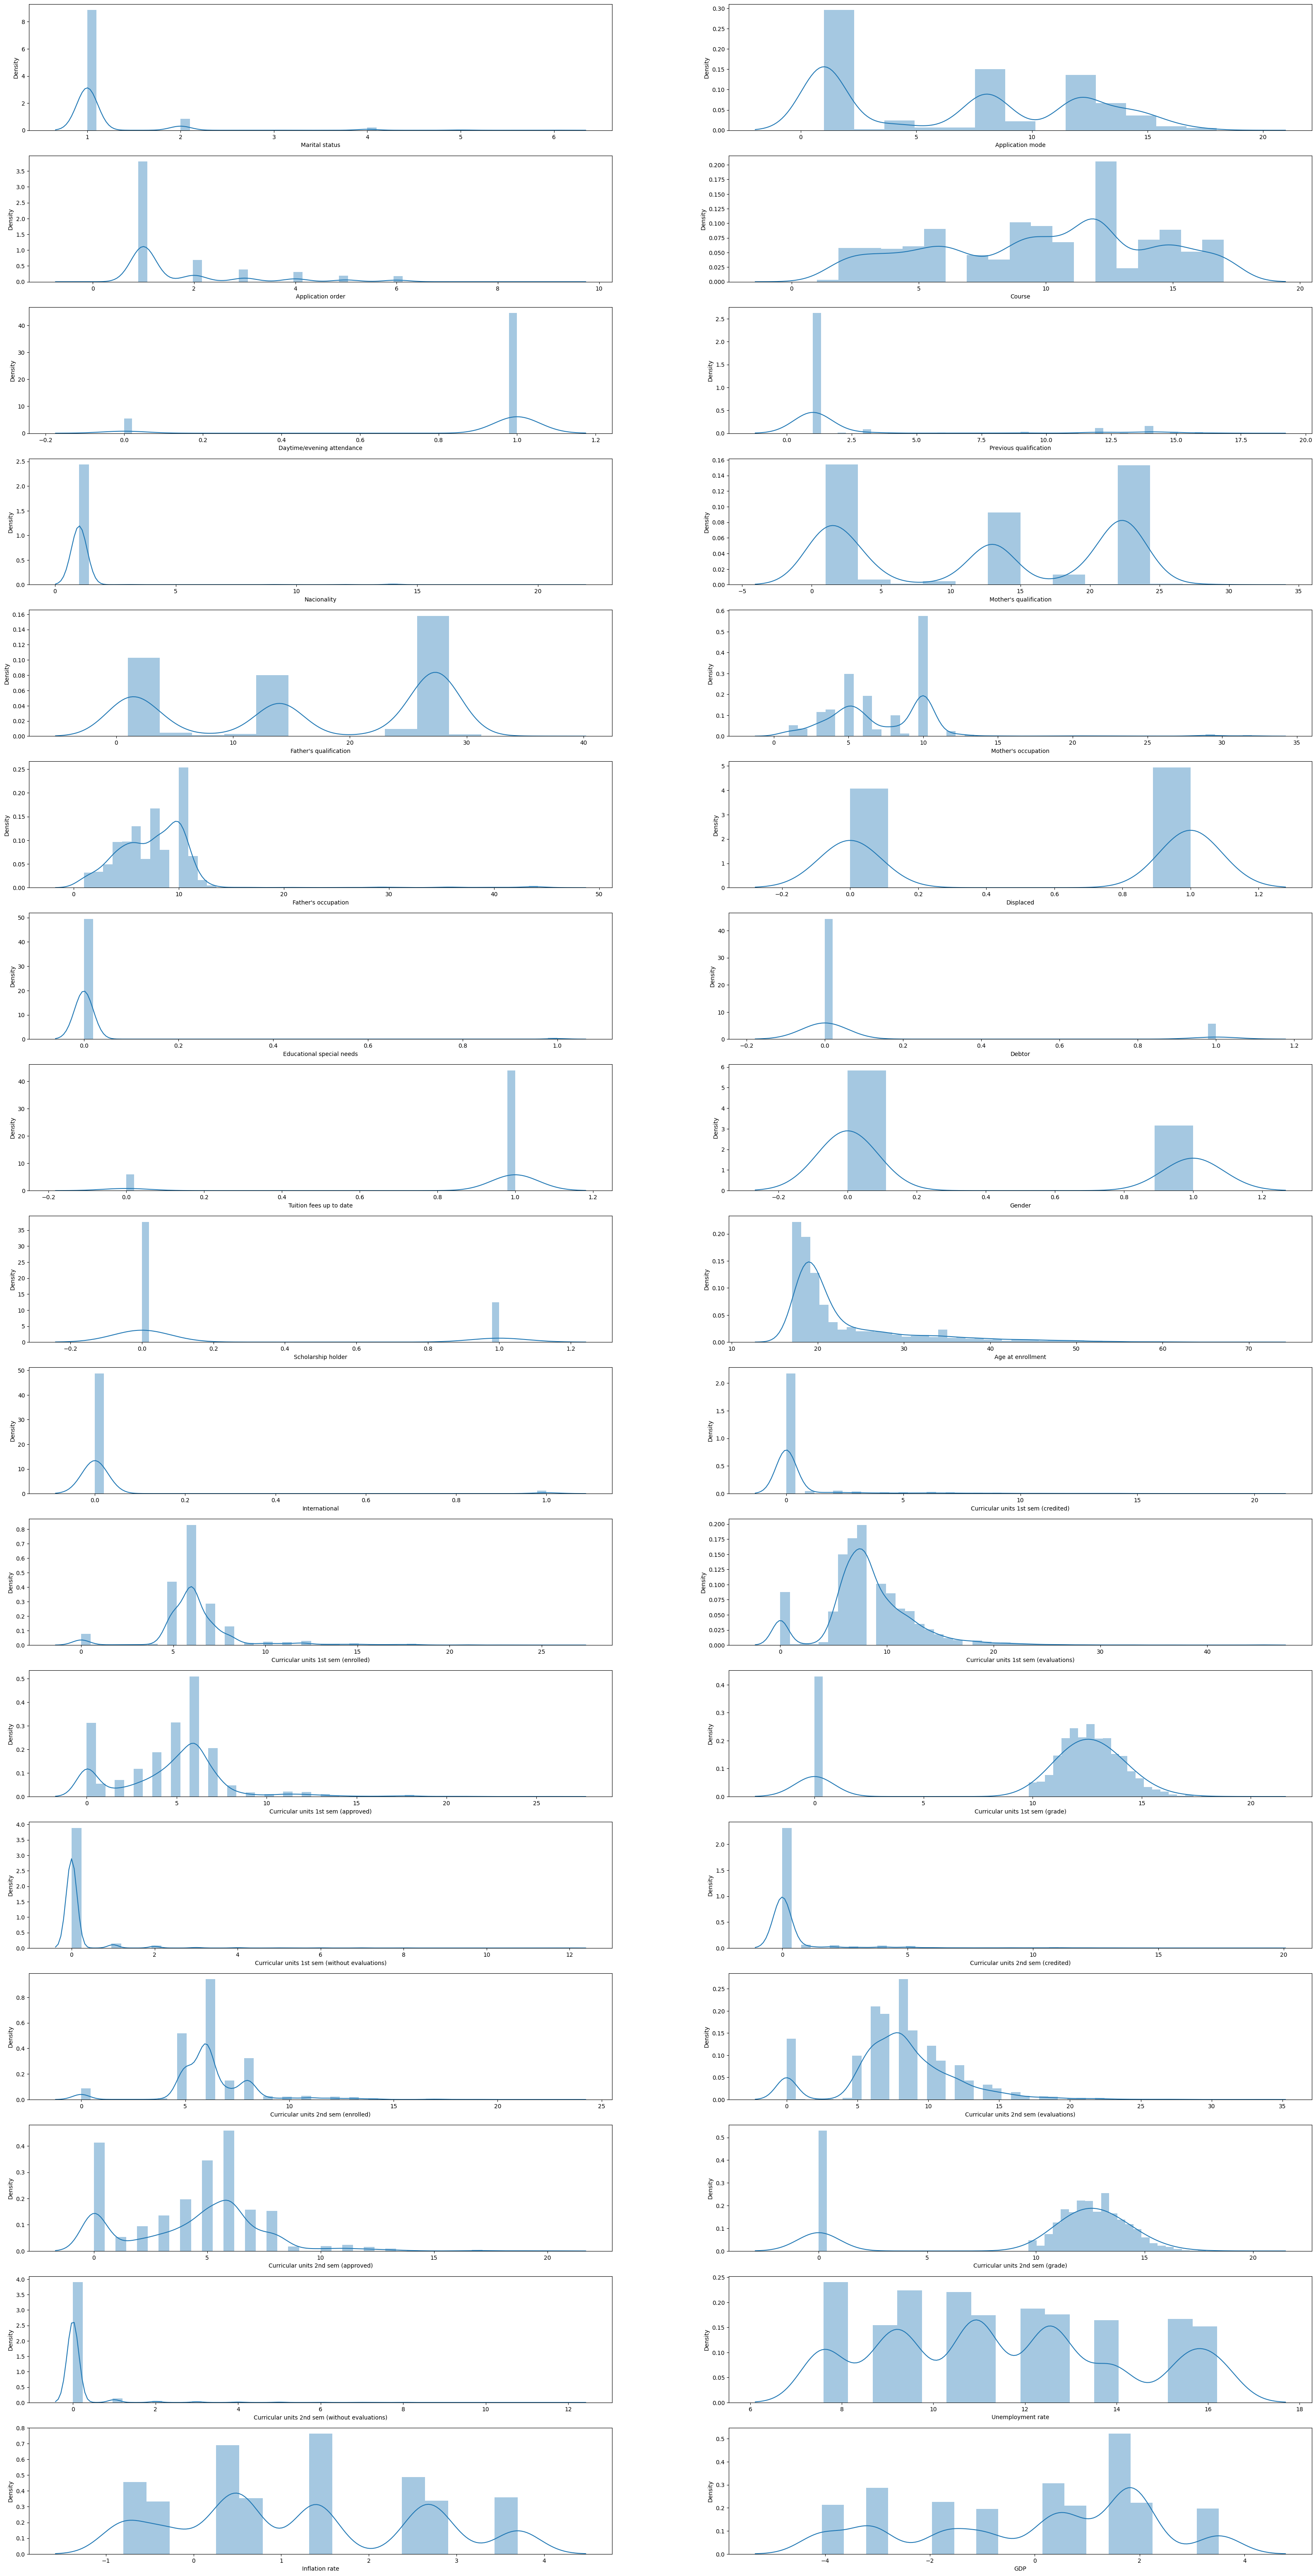

In [ ]:
fig, axes = plt.subplots(nrows = 17, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,80)

for ax, col in zip(axes, data.columns):
  sns.distplot(data[col], ax = ax)

A grid of 17 rows and 2 columns of subplots, sets the figure size to 40x40 inches, and then plots boxplots for each column of the dataset against the 'Target' variable using seaborn.

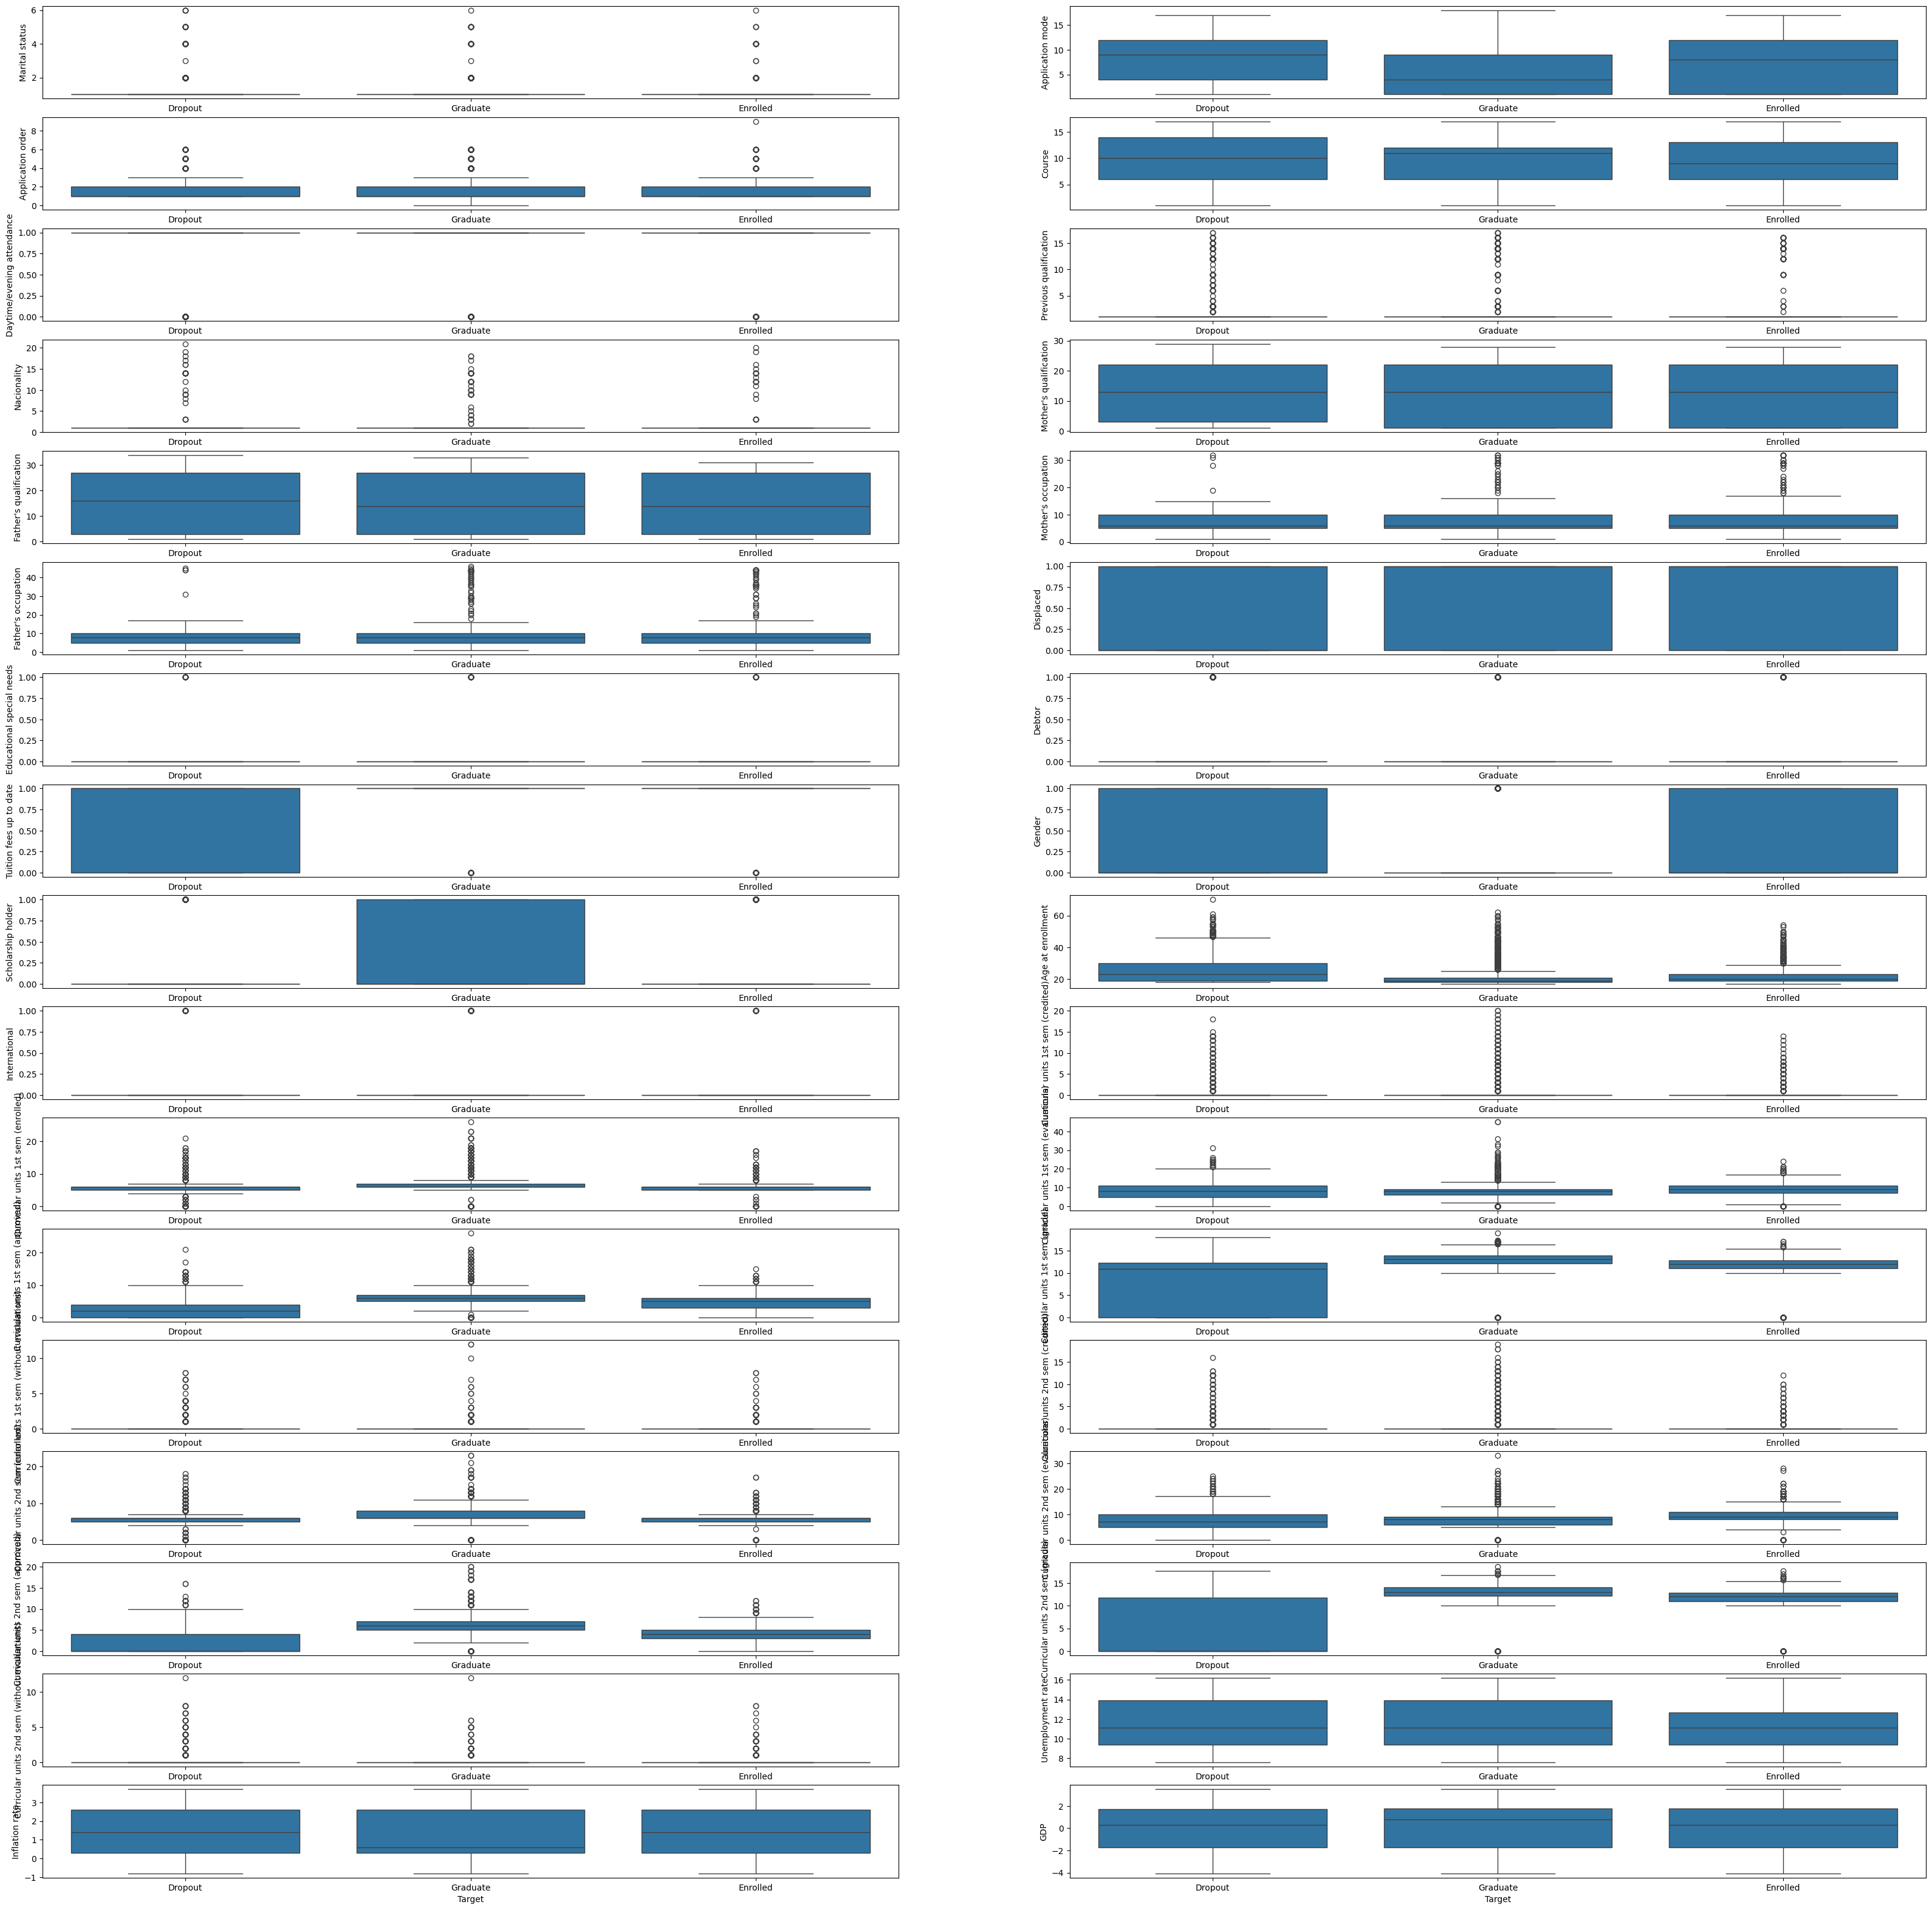

In [ ]:
fig, axes = plt.subplots(nrows = 17, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, data.columns):
  sns.boxplot(x='Target',y=data[col], ax = ax , data=data)

**4.Feature scaling**

In [ ]:
data=data[data.Target!='Enrolled']

In [ ]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [ ]:
data.drop(['International','Nacionality',"Father's qualification",'Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (approved)','Course','Educational special needs','Unemployment rate','Inflation rate'],axis=1,inplace=True)

In [ ]:
data

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Mother's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,8,5,1,1,13,6,10,1,0,...,0.000000,0,0,0,0,0,0.000000,0,1.74,0
1,1,6,1,1,1,1,4,4,1,0,...,14.000000,0,0,6,6,6,13.666667,0,0.79,1
2,1,1,5,1,1,22,10,10,1,0,...,0.000000,0,0,6,0,0,0.000000,0,1.74,0
3,1,8,2,1,1,23,6,4,1,0,...,13.428571,0,0,6,10,5,12.400000,0,-3.12,1
4,2,12,1,0,1,22,10,10,0,0,...,12.333333,0,0,6,6,6,13.000000,0,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,1,6,5,0,0,...,13.600000,0,0,6,8,5,12.666667,0,-4.06,1
4420,1,1,2,1,1,1,10,10,1,1,...,12.000000,0,0,6,6,2,11.000000,0,2.02,0
4421,1,1,1,1,1,22,10,10,1,0,...,14.912500,0,0,8,9,1,13.500000,0,0.79,0
4422,1,1,1,1,1,22,8,5,1,0,...,13.800000,0,0,5,6,5,12.000000,0,-3.12,1


**5.Train test Split**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X=data.drop(['Target'],axis=1)
y=data['Target']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3,stratify=y)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

**6.Model training**

**6.1 Model training using KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
y_pred=knn.predict(X_test)
score_knn=accuracy_score(y_pred,y_test)

**6.1.1 Evaluation**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[353  73]
 [145 518]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       426
           1       0.88      0.78      0.83       663

    accuracy                           0.80      1089
   macro avg       0.79      0.80      0.80      1089
weighted avg       0.81      0.80      0.80      1089



Text(50.722222222222214, 0.5, 'True')

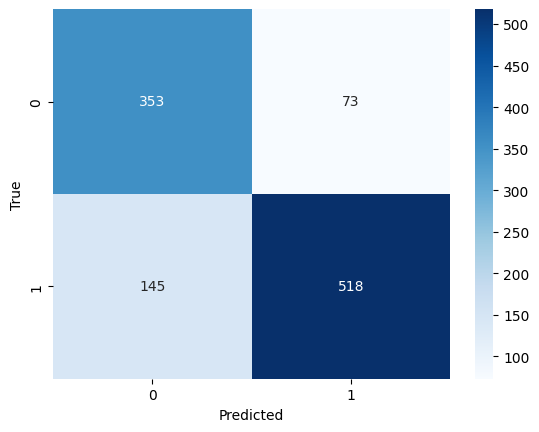

In [ ]:
sns.heatmap(conf_mat,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print('Misclassification Error Rate:',round(np.mean(y_pred!=y_test),3))

Misclassification Error Rate: 0.2


'k' elbow method

In [ ]:
error_rate=[]

#will take some time
for i in range(1,60):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

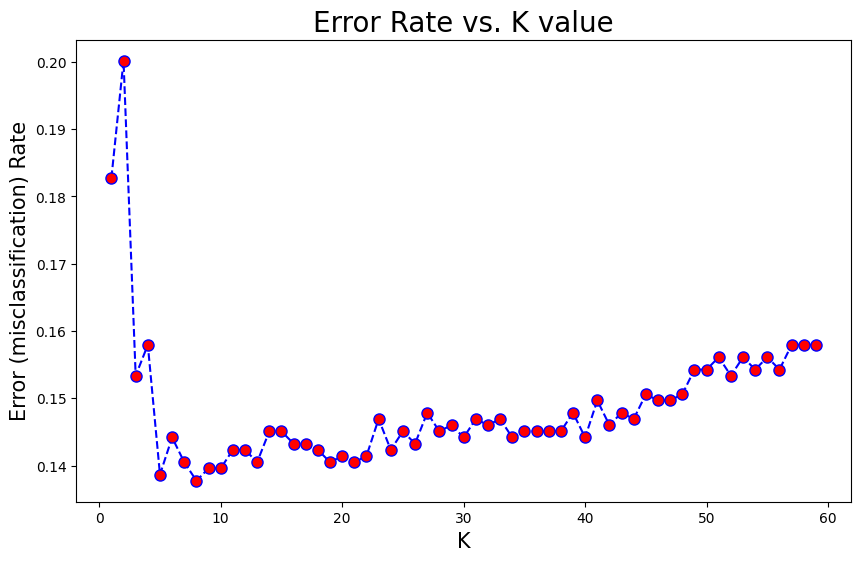

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed', marker='o',markerfacecolor='red',markersize=8)
plt.title('Error Rate vs. K value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

**6.2 Model training using Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None , 10, 20],
    'min_samples_split': [2,4,5],
    'min_samples_leaf': [1,2,4],
}

In [ ]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
rf=RandomForestClassifier(**rf_Grid.best_params_)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [ ]:
y_pred1=rf.predict(X_test)
score_rf=accuracy_score(y_test,y_pred1)

**6.2.1 Evaluation**

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       426
           1       0.88      0.96      0.92       663

    accuracy                           0.90      1089
   macro avg       0.91      0.88      0.89      1089
weighted avg       0.90      0.90      0.90      1089



Text(50.722222222222214, 0.5, 'True')

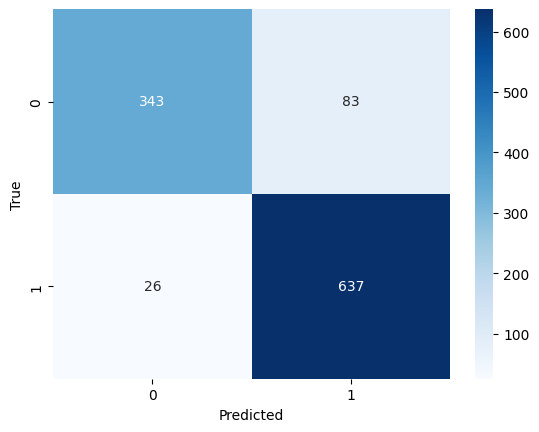

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print('Misclassification Error Rate:',round(np.mean(y_pred1!=y_test),3))

Misclassification Error Rate: 0.1


**6.3 Model training using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
param_grid = {
    'penalty': ['l1','l2'],
    'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
    'max_iter': [1000,1500,2000],
    'multi_class' :['auto', 'ovr', 'multinomial'],
    'class_weight' :['dict','balanced']
}

In [ ]:
lgr_grid=GridSearchCV(estimator=lgr,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=True)
lgr_grid.fit(X_train,y_train)
lgr_grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


324 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sk

{'class_weight': 'balanced',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
log=LogisticRegression(**lgr_grid.best_params_)
log.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

In [ ]:
y_pred2=log.predict(X_test)
score_log=accuracy_score(y_test,y_pred2)

**6.3.1 Evaluation**

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       426
           1       0.91      0.93      0.92       663

    accuracy                           0.90      1089
   macro avg       0.90      0.89      0.89      1089
weighted avg       0.90      0.90      0.90      1089



Text(50.722222222222214, 0.5, 'True')

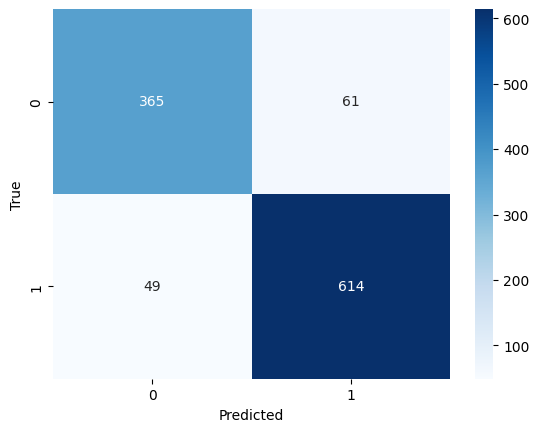

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print('Misclassification Error Rate:',round(np.mean(y_pred2!=y_test),3))

Misclassification Error Rate: 0.101


**7.Conclusion**

In [ ]:
print('ACCURACY')
print('Accuracy of Random Forest is',round(score_rf,3))
print('Accuracy of Logistic Regession is',round(score_log,3))
print('Accuracy of KNN is',round(score_knn,3))

ACCURACY
Accuracy of Random Forest is 0.9
Accuracy of Logistic Regession is 0.899
Accuracy of KNN is 0.8
